# Logistic Regresyon

Logistic Regresyon aslen bir derin öğrenme algoritması değildir fakat Neural Network'un ilk adımı gibi düşünülebilir. Bu derste Logistic Regresyonun Pytorch Kullanarak implement edilmesini öğreneceğiz.

logistic Regresyon ===> linear regresyon + logistic function(softmax)

Logistic Regression Adımları:

1-Import Libraries

2-Prepare Dataset

3-Create Logistic Regression Model

4-Instantiate Model(input_dim = 2828 # size of image pxpx | output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9 | create model)

5-Instantiate Loss (Cross entropy loss)

6-Instantiate Optimizer (SGD Optimizer)

7-Traning the Model

8-Prediction

In [3]:
# Import Libraries
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable  #Gradient hesabı yapacağımız için Variable'lere ihtiyaç vardır.
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

İlk adımda verisetini yükledik, DataFrame  veri yapısı haline getirdik. Ardından hedef değişkenimiz ve özellikler sütunları birbirinde ayırdık. feature_numpy değişkeninide elimizdeki veriler resimlerden oluştuğu için piksel değerilerini 0-1 arasında normalizasyon işlemi uyguladık. 

Ardından test-train split işlemi klasik olarak; test verisetimizi ayırdık.

x_train, x_test, y_train, y_test gibi düşünülebilir.

In [14]:
#Mnist dataset
#Prepare Dataset
#load dataset

train= pd.read_csv("train.csv", dtype= np.float32)
#split
targets_numpy= train.label.values
feature_numpy= train.loc[:,train.columns!="label"].values/255 #normalization

#train test split trainSize= 0.8, testSize= 0.2
features_train, features_test, targets_train, targets_test= train_test_split(feature_numpy, targets_numpy, test_size= 0.2, random_state=46)

PyTorch kütüphanesinde gradient hesabı yapabilmek için ve bu değerleri biriktirebilmek bizim Variable değikenine ihtiyacımız vardı. Feature ve targetları kullanarak önce tensorlarımızı elde edelim.

In [17]:
#featureTrain ve featureTest için tensor oluşturmak

featuresTrain= torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

#targetTrain ve targetTest için tensor oluşturmak

featuresTest= torch.from_numpy(features_test)
targetsTest= torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size, epoch ve iteration

batc_size verimizi kaça bölerek train edeceğimiz değerdir. 1000 sample olduğunu varsayarsak biz bunu 10 gruba bölersek her bir grup içindeki sample sayısı 100 olacaktır. Bu 10 grubu sırayla train ederiz. (Group size)

Batch_size eğer ki 100 olacaksa bunun anlamı 336 adet grubumuzun olacağıdır. 336 kerede bir verisetini train ederiz.Toplamda 33600 sample'ı bir kerede train etmiş olacağız. Burada bir kerede olarak vurguladığımız şey ise epoch sayısıdır.

Epoch neden önemli ? Biz parametreleri her bir iterasyonda güncelliyoruz. Epoch sayısının da iyi belirlenmesi burada önemlidir.
Loss'u azaltana kadar train etmeliyiz. Epoch sayısının artacağı anlamına gelecektir. 

1 epoch kaç iterasyon sürecektir? datamızı 336 gruba böldük. batch_size=100, 1 epoch 336 adet iterasyondan oluşuyor.Epoch sayısını 29 belirledik haliyle iterasyon sayımız : 9744 adet olacaktır.

In [33]:
#batch_size, epoch ve iteration

batch_size= 100
n_iters=10000
num_epochs= n_iters/(len(features_train)/batch_size)
num_epochs= int(num_epochs)

Elimizdeki veri setini tensor'a çevireceğiz.

In [34]:
#PyToch train and test sets
train= torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test= torch.utils.data.TensorDataset(featuresTest, targetsTest)

DataLoader, eğitim veya test verilerinin yüksek verimlilikle işlenebilmesi için veri yükleyicisini yöneten bir PyTorch sınıfıdır.

In [35]:
#data Loader
train_loader= DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader= DataLoader(test, batch_size=batch_size, shuffle=False)

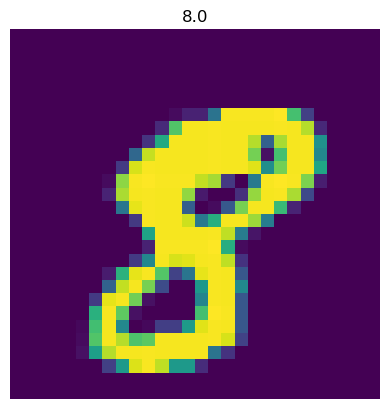

In [40]:
#visualize one of the images in dataset
plt.imshow(feature_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig("graph.png")
plt.show()

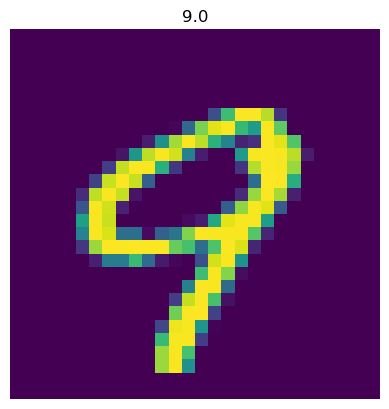

In [41]:
#visualize one of the images in dataset
plt.imshow(feature_numpy[100].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[100]))
plt.savefig("graph2.png")
plt.show()

# MODEL

İlk satırda bir sınıf tanımlanır:
Bu sınıf PyTorch'un "nn.Module" sınıfının tüm özelliklerini miras alır ve "LogisticRegressionModel" sınıfı "nn.Module" sınıfının tüm özelliklerine erişebilir.

__init__ yontemi sınıfın özelliklerini tanımlar. (Constructor) ve iki parametre alır bunlar girdi ve çıktı size.

super(LogisticRegressionModel, self).__init__() ifadesi nn.Module sınıfının constructor yöntemini çağırır ve sınıfın tüm özelliklerini miras almasını sağlar.

 
self.linear = nn.Linear(input_dim, output_dim) satırı bir nn.Linear katmanı oluşturur.(obje) girdilerin boyutunu input_dim, outpuların boyutunu output_dim olarak alır ve lineer dönüşüm gerçekleştirir.Bu katman, modelin temel lineer dönüşüm işlevini sağlar.

"forward" yöntemi PyTorch'un "nn.Module" sınıfında tanımlı olan bir yöntemdir. Bu yöntem modelin girdi verilerini alır ve modelin çıktı verisini hesaplar.

input_dim= (28*28), outout_dim= 10 (0-9) label

model = LogisticRegressionModel(input_dim, output_dim) ifadesi, LogisticRegressionModel sınıfından bir örnek oluşturur ve model adı altında saklar.

error = nn.CrossEntropyLoss() loss function olacaktır ve çok sınıflı sınıflandırma poblemler için idealdir.

learning_rate değişkeni, optimizasyon işlemi sırasında adım büyüklüğünü kontrol etmek için kullanılır.

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) model parametlerinin optimizasyon işlemi için kullanılan adımdır.u, modelin parametrelerini güncellemek ve kaybı minimize etmek için kullanılan bir optimizasyon algoritmasıdır.


  

In [42]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss() #softmax bunun içindedir

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [45]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.5961086750030518  Accuracy: 85.96428680419922%
Iteration: 1000  Loss: 0.603194534778595  Accuracy: 86.14286041259766%
Iteration: 1500  Loss: 0.531976044178009  Accuracy: 86.22618865966797%
Iteration: 2000  Loss: 0.4895007312297821  Accuracy: 86.33333587646484%
Iteration: 2500  Loss: 0.6910585165023804  Accuracy: 86.42857360839844%
Iteration: 3000  Loss: 0.6305940747261047  Accuracy: 86.58333587646484%
Iteration: 3500  Loss: 0.4191972017288208  Accuracy: 86.69047546386719%
Iteration: 4000  Loss: 0.4631045460700989  Accuracy: 86.79762268066406%
Iteration: 4500  Loss: 0.4535011649131775  Accuracy: 86.88095092773438%
Iteration: 5000  Loss: 0.49723902344703674  Accuracy: 87.01190185546875%
Iteration: 5500  Loss: 0.48106706142425537  Accuracy: 87.17857360839844%
Iteration: 6000  Loss: 0.5628530979156494  Accuracy: 87.22618865966797%
Iteration: 6500  Loss: 0.5067620277404785  Accuracy: 87.30952453613281%
Iteration: 7000  Loss: 0.5056192278862  Accuracy: 87.345237731933

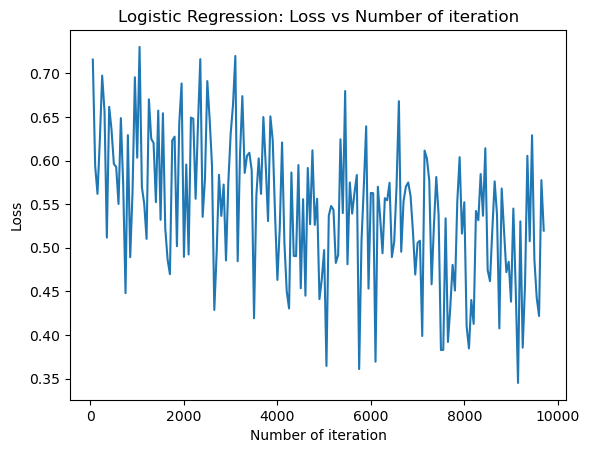

In [46]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()